In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [3]:
# Read CSV data

In [4]:
df_house_A_0 = pd.read_csv('HouseA_HW5.csv')
df_house_B_0 = pd.read_csv('HouseB_HW5.csv')
df_house_C_0 = pd.read_csv('HouseC_HW5.csv')
df_house_D_0 = pd.read_csv('HouseD_HW5.csv')

In [5]:
df_house_D_0.head()

,Date/Time,All
0,01/01 01:00:00,17.540900
1,01/01 02:00:00,17.092382
2,01/01 03:00:00,16.768862
3,01/01 04:00:00,16.972979
4,01/01 05:00:00,17.180736


## Data Preprocessing

In [6]:
# Split the Date/Time Column by removing spaces

In [7]:
df_house_A_1 = pd.concat([df_house_A_0['Date/Time'].str.split(' ', expand=True),df_house_A_0['Consumption (kW)']], axis=1)
df_house_B_1 = pd.concat([df_house_B_0['Date/Time'].str.split(' ', expand=True),df_house_B_0['all']], axis=1)
df_house_C_1 = pd.concat([df_house_C_0['Date/Time'].str.split(' ', expand=True),df_house_C_0['all']], axis=1)
df_house_D_1 = pd.concat([df_house_D_0['Date/Time'].str.split(' ', expand=True),df_house_D_0['All']], axis=1)

In [8]:
# Drop empty columns. Rename the numerical columns and column names with spaces

In [9]:
cols = [0,2]

# House A
df_house_A_1.drop(df_house_A_1.columns[cols],axis=1,inplace=True)
df_house_A_1.rename(columns={1: "Date", 3:"Time", "Consumption (kW)": "consumption_kw_A"},inplace=True)

# House B
df_house_B_1.drop(df_house_B_1.columns[cols],axis=1,inplace=True)
df_house_B_1.rename(columns={1: "Date", 3:"Time", "all": "consumption_kw_B"},inplace=True)

# House C
df_house_C_1.drop(df_house_C_1.columns[cols],axis=1,inplace=True)
df_house_C_1.rename(columns={1: "Date", 3:"Time", "all": "consumption_kw_C"},inplace=True)

# House D
df_house_D_1.drop(df_house_D_1.columns[cols],axis=1,inplace=True)
df_house_D_1.rename(columns={1: "Date", 3:"Time", "All": "consumption_kw_D"},inplace=True)

In [10]:
# Split columns with / and add the year

In [11]:
# House A
df_house_A_2 = pd.concat([df_house_A_1['Date'].str.split('/', expand=True),df_house_A_1['Time'],
                          df_house_A_1['consumption_kw_A']], axis=1)
df_house_A_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_A_2["Year"] = 2021

# House B
df_house_B_2 = pd.concat([df_house_B_1['Date'].str.split('/', expand=True),df_house_B_1['Time'], 
                          df_house_B_1['consumption_kw_B']], axis=1)
df_house_B_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_B_2["Year"] = 2021

# House C
df_house_C_2 = pd.concat([df_house_C_1['Date'].str.split('/', expand=True),df_house_C_1['Time'], 
                          df_house_C_1['consumption_kw_C']], axis=1)
df_house_C_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_C_2["Year"] = 2021

# House D
df_house_D_2 = pd.concat([df_house_D_1['Date'].str.split('/', expand=True),df_house_D_1['Time'], 
                          df_house_D_1['consumption_kw_D']], axis=1)
df_house_D_2.rename(columns={0: "Month", 1:"Day"},inplace=True)
df_house_D_2["Year"] = 2021

In [12]:
# Create date_time column with the format "YYYYY-MM-DD HH:MM:ss" and date change 24:00:00 into 00:00:00

In [13]:
cols=["Year","Month","Day"]

# House A
df_house_A_2['date_1'] = df_house_A_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_A_2['date_1'] = pd.to_datetime(df_house_A_2['date_1'])
df_house_A_2['date_time'] = pd.to_datetime(df_house_A_2.date_1) + pd.to_timedelta(df_house_A_2.Time, unit='h')

# House B
df_house_B_2['date_1'] = df_house_B_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_B_2['date_1'] = pd.to_datetime(df_house_B_2['date_1'])
df_house_B_2['date_time'] = pd.to_datetime(df_house_B_2.date_1) + pd.to_timedelta(df_house_B_2.Time, unit='h')

# House C
df_house_C_2['date_1'] = df_house_C_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_C_2['date_1'] = pd.to_datetime(df_house_C_2['date_1'])
df_house_C_2['date_time'] = pd.to_datetime(df_house_C_2.date_1) + pd.to_timedelta(df_house_C_2.Time, unit='h')

# House D
df_house_D_2['date_1'] = df_house_D_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_house_D_2['date_1'] = pd.to_datetime(df_house_D_2['date_1'])
df_house_D_2['date_time'] = pd.to_datetime(df_house_D_2.date_1) + pd.to_timedelta(df_house_D_2.Time, unit='h')

In [14]:
# Get the final columns needed to model

In [15]:
df_house_A_clean = df_house_A_2[['date_time', 'consumption_kw_A']]
df_house_B_clean = df_house_B_2[['date_time', 'consumption_kw_B']]
df_house_C_clean = df_house_C_2[['date_time', 'consumption_kw_C']]
df_house_D_clean = df_house_D_2[['date_time', 'consumption_kw_D']]

In [16]:
df_house_all_clean = df_house_B_clean.merge(df_house_C_clean, on='date_time', how='left')\
                                    .merge(df_house_D_clean, on='date_time', how='left')\
                                    .merge(df_house_A_clean, on='date_time', how='left')

In [17]:
df_house_all_clean = df_house_all_clean [['date_time', 'consumption_kw_A', 'consumption_kw_B',\
                                          'consumption_kw_C', 'consumption_kw_D']]          

In [18]:
df_house_all_clean

,date_time,consumption_kw_A,consumption_kw_B,consumption_kw_C,consumption_kw_D
0,2021-01-01 01:00:00,NaN,40.793727,31.905699,17.540900
1,2021-01-01 02:00:00,NaN,41.837084,33.507795,17.092382
2,2021-01-01 03:00:00,NaN,41.642094,33.627417,16.768862
3,2021-01-01 04:00:00,NaN,42.812967,35.474427,16.972979
4,2021-01-01 05:00:00,NaN,44.793965,35.959651,17.180736
...,...,...,...,...,...
8011,2021-11-30 20:00:00,19.806196,26.424780,11.941523,11.588644
8012,2021-11-30 21:00:00,19.912400,26.270907,12.091889,12.336184
8013,2021-11-30 22:00:00,20.801582,25.880839,13.430376,13.060969
8014,2021-11-30 23:00:00,21.512624,25.476308,14.736651,13.687397


In [19]:
df_house_all_clean['consumption_kw_avg'] = df_house_all_clean.mean(axis=1)

In [20]:
df_house_all_clean.head()

,date_time,consumption_kw_A,consumption_kw_B,consumption_kw_C,consumption_kw_D,consumption_kw_avg
0,2021-01-01 01:00:00,NaN,40.793727,31.905699,17.540900,30.080108
1,2021-01-01 02:00:00,NaN,41.837084,33.507795,17.092382,30.812420
2,2021-01-01 03:00:00,NaN,41.642094,33.627417,16.768862,30.679458
3,2021-01-01 04:00:00,NaN,42.812967,35.474427,16.972979,31.753458
4,2021-01-01 05:00:00,NaN,44.793965,35.959651,17.180736,32.644784


# Task 1

### Training and Testing Set Split

In [20]:
break_date = "2021-12-01 00"

In [21]:
df_house_A_train = df_house_A_clean[df_house_A_clean["date_time"] <= break_date]
df_house_A_test = df_house_A_clean[df_house_A_clean["date_time"] > break_date]

## T1.1 Deep Feed-Forward Neural Network

### Training Data Preparation

In [22]:
from numpy import array

In [23]:
# Split a univariate sequence into samples

In [24]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [25]:
# Define the input sequence

In [26]:
train = df_house_A_train['consumption_kw_A']

In [27]:
# Choose a number of time steps

In [28]:
n_steps = 4

In [29]:
# Split into samples

In [30]:
X, y = split_sequence(train, n_steps)
print(len(X), len(y))

44 44


In [31]:
X.shape, y.shape

((44, 4), (44,))

In [32]:
# Summarize the data

In [33]:
for i in range(len(X)):
    print(X[i], y[i])

[25.83881937 24.27811542 23.92877239 24.0758738 ] 23.86552268
[24.27811542 23.92877239 24.0758738  23.86552268] 24.1825029
[23.92877239 24.0758738  23.86552268 24.1825029 ] 25.70501706
[24.0758738  23.86552268 24.1825029  25.70501706] 27.9187152
[23.86552268 24.1825029  25.70501706 27.9187152 ] 26.47251872
[24.1825029  25.70501706 27.9187152  26.47251872] 24.47981345
[25.70501706 27.9187152  26.47251872 24.47981345] 25.53278056
[27.9187152  26.47251872 24.47981345 25.53278056] 22.94586519
[26.47251872 24.47981345 25.53278056 22.94586519] 22.22066915
[24.47981345 25.53278056 22.94586519 22.22066915] 21.19769214
[25.53278056 22.94586519 22.22066915 21.19769214] 20.37997356
[22.94586519 22.22066915 21.19769214 20.37997356] 19.93592864
[22.22066915 21.19769214 20.37997356 19.93592864] 21.7514295
[21.19769214 20.37997356 19.93592864 21.7514295 ] 25.41853073
[20.37997356 19.93592864 21.7514295  25.41853073] 24.42722472
[19.93592864 21.7514295  25.41853073 24.42722472] 25.85604072
[21.7514295

In [34]:
y.shape

(44,)

### Model Training

In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Flatten

In [36]:
model = Sequential()
model.add(Flatten(input_shape=(n_steps, 1), name='Input-Layer'))
model.add(Dense(2, activation='relu', name='Hidden-Layer')) #4, 6, 8, 10
model.add(Dense(1, name='Output-Layer'))
model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input-Layer (Flatten)        (None, 4)                 0         
_________________________________________________________________
Hidden-Layer (Dense)         (None, 2)                 10        
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X, y, epochs=50, verbose=0)

### Test Data Set Treatment

In [39]:
# Choose a number of time steps

In [40]:
n_steps = 4

In [41]:
# Test Set with Lag created to get the X_test to predict in the model

In [42]:
test_set_with_lag = df_house_A_train.iloc[-n_steps:].append(df_house_A_test, ignore_index = True)
test_set_with_lag = test_set_with_lag['consumption_kw_A']
test_set_with_lag = test_set_with_lag.reset_index()
test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
test_set_with_lag = test_set_with_lag.squeeze()

In [43]:
test_set_with_lag.shape

(748,)

In [44]:
# Split into samples

In [45]:
X_test, y_test = split_sequence(test_set_with_lag, n_steps)

In [46]:
print(len(X_test), len(y_test))

744 744


In [47]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]

In [48]:
n_features = 1
X_test = X_test.reshape((len(X_test), n_steps, n_features))

In [49]:
X_test.shape

(744, 4, 1)

### Actual Test Set to compare with the predicted values

In [50]:
test = df_house_A_test['consumption_kw_A']
test = test.reset_index()
test.drop(test.columns[0],axis=1,inplace=True)
test = test.squeeze()

In [51]:
test.shape

(744,)

### Model Prediction

In [52]:
preds = model.predict(X_test)

In [53]:
# Put predictions in Pandas Dataframe

In [54]:
# test = test.iloc[n_steps:]

In [55]:
preds = pd.DataFrame(preds)

In [56]:
preds.shape

(744, 1)

### MAPE and MAE

In [57]:
import numpy as np

In [58]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [60]:
def report_metrics(true,predictions):
    print (f" n_steps: {n_steps}\
              MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [61]:
report_metrics  (test, preds)

 n_steps: 4              MAPE: 1.02044764083544              MAE: 29.19428681492637


In [63]:
data = []

In [64]:
FFNN_Results = pd.DataFrame(data,
                     columns=['n_steps', 'MAPE', 'MAE'])

In [65]:
for i in range (2,48):
    X, y = split_sequence(train, i)
#    print(len(X), len(y))

# Model building
    model = Sequential()
    model.add(Flatten(input_shape=(i, 1))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, verbose=0)
    
# Testing data treatment for the model to get the X_test
    test_set_with_lag = df_house_A_train.iloc[-i:].append(df_house_A_test, ignore_index = True)
    test_set_with_lag = test_set_with_lag['consumption_kw_A']
    test_set_with_lag = test_set_with_lag.reset_index()
    test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
    test_set_with_lag = test_set_with_lag.squeeze()

# Actual Test Set to compare with the predicted values
    test = df_house_A_test['consumption_kw_A']
    test = test.reset_index()
    test.drop(test.columns[0],axis=1,inplace=True)
    test = test.squeeze()
    
# Model Testing
    X_test, y_test = split_sequence(test_set_with_lag, i)
    n_features = 1
    X_test = X_test.reshape((len(X_test), i, n_features))
    preds = model.predict(X_test)
    preds = pd.DataFrame(preds)

# Get FFNN results
    FFNN_Results = FFNN_Results.append({'n_steps': i,
                         'MAPE': mean_absolute_percentage_error(test,preds),
                         'MAE': mean_absolute_error(test,preds)}, ignore_index=True)

In [66]:
import numpy as np
import matplotlib.pyplot as plt

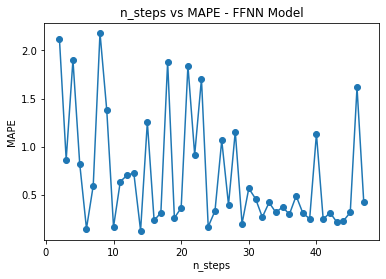

In [67]:
plt.plot(FFNN_Results['n_steps'], FFNN_Results['MAPE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAPE')
plt.title("n_steps vs MAPE - FFNN Model")
plt.show()

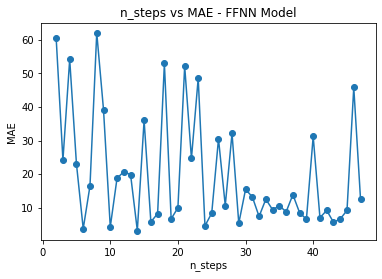

In [68]:
plt.plot(FFNN_Results['n_steps'], FFNN_Results['MAE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAE')
plt.title("n_steps vs MAE - FFNN Model")
plt.show()

In [69]:
FFNN_Results

,n_steps,MAPE,MAE
0,2.0,2.121256,60.443240
1,3.0,0.867120,24.198264
2,4.0,1.898848,54.111323
3,5.0,0.825033,23.016092
4,6.0,0.150785,3.765919
5,7.0,0.596533,16.510690
6,8.0,2.181452,62.032907
7,9.0,1.378478,39.170293
8,10.0,0.168562,4.310744
9,11.0,0.638139,18.776936


## T1.2 LSTM Model

### Training Data Preparation

In [62]:
from numpy import array

In [63]:
# Define the input sequence

In [64]:
train = df_house_A_train['consumption_kw_A']

In [65]:
# Choose a number of time steps

In [66]:
n_steps = 4

In [67]:
# Split into samples

In [68]:
X, y = split_sequence(train, n_steps)

In [69]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]

In [70]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Model Training

In [71]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [72]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features))) # 25, 50, 75, 100, 150, 200
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(X, y, epochs=50, verbose=0)

### Test data set treatment

In [75]:
# Choose a number of time steps

In [76]:
n_steps = 4

In [77]:
# Test Set with Lag created to get the X_test to predict in the model

In [78]:
test_set_with_lag = df_house_A_train.iloc[-n_steps:].append(df_house_A_test, ignore_index = True)
test_set_with_lag = test_set_with_lag['consumption_kw_A']
test_set_with_lag = test_set_with_lag.reset_index()
test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
test_set_with_lag = test_set_with_lag.squeeze()

In [79]:
test_set_with_lag.shape

(748,)

In [80]:
# Split into samples

In [81]:
X_test, y_test = split_sequence(test_set_with_lag, n_steps)

In [82]:
print(len(X_test), len(y_test))

744 744


In [83]:
# Reshape from [samples, timesteps] into [samples, timesteps, features]

In [84]:
n_features = 1
X_test = X_test.reshape((len(X_test), n_steps, n_features))

In [85]:
X_test.shape

(744, 4, 1)

### Actual Test Set to compare with the predicted values

In [86]:
test = df_house_A_test['consumption_kw_A']
test = test.reset_index()
test.drop(test.columns[0],axis=1,inplace=True)
test = test.squeeze()

In [87]:
test.shape

(744,)

### Model Prediction

In [88]:
preds = model.predict(X_test)

In [89]:
# Put predictions in Pandas Dataframe

In [90]:
preds = pd.DataFrame(preds)

In [91]:
preds.shape

(744, 1)

### MAPE and MAE

In [92]:
report_metrics  (test, preds)

 n_steps: 4              MAPE: 0.11404676086014426              MAE: 2.8733199054896352


In [101]:
data = []

In [102]:
LSTM_Results = pd.DataFrame(data,
                     columns=['n_steps', 'MAPE', 'MAE'])

In [103]:
for i in range (2,25):
    train = df_house_A_train['consumption_kw_A']
    X, y = split_sequence(train, i)
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    
# Model building
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(i, n_features))) # 25, 50, 75, 100, 150, 200
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=50, verbose=0)
    
# Testing data treatment for the model to get the X_test
    test_set_with_lag = df_house_A_train.iloc[-i:].append(df_house_A_test, ignore_index = True)
    test_set_with_lag = test_set_with_lag['consumption_kw_A']
    test_set_with_lag = test_set_with_lag.reset_index()
    test_set_with_lag.drop(test_set_with_lag.columns[0],axis=1,inplace=True)
    test_set_with_lag = test_set_with_lag.squeeze()

# Actual Test Set to compare with the predicted values
    test = df_house_A_test['consumption_kw_A']
    test = test.reset_index()
    test.drop(test.columns[0],axis=1,inplace=True)
    test = test.squeeze()
    
# Model Testing
    X_test, y_test = split_sequence(test_set_with_lag, i)
    n_features = 1
    X_test = X_test.reshape((len(X_test), i, n_features))
    preds = model.predict(X_test)
    preds = pd.DataFrame(preds)

# Get FFNN results
    LSTM_Results = LSTM_Results.append({'n_steps': i,
                         'MAPE': mean_absolute_percentage_error(test,preds),
                         'MAE': mean_absolute_error(test,preds)}, ignore_index=True)

In [104]:
LSTM_Results

,n_steps,MAPE,MAE
0,2.0,0.094646,2.515724
1,3.0,0.094344,2.393962
2,4.0,0.126991,3.279583
3,5.0,0.094202,2.474792
4,6.0,0.084360,2.208753
5,7.0,0.091399,2.517883
6,8.0,0.088951,2.359669
7,9.0,0.152116,4.578758
8,10.0,0.123937,3.616390
9,11.0,0.121345,3.441474


In [105]:
import numpy as np
import matplotlib.pyplot as plt

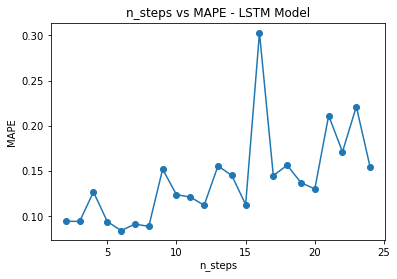

In [106]:
plt.plot(LSTM_Results['n_steps'], LSTM_Results['MAPE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAPE')
plt.title("n_steps vs MAPE - LSTM Model")
plt.show()

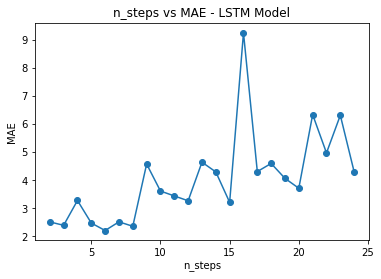

In [107]:
plt.plot(LSTM_Results['n_steps'], LSTM_Results['MAE'], 'o-')
plt.xlabel('n_steps')
plt.ylabel('MAE')
plt.title("n_steps vs MAE - LSTM Model")
plt.show()

## T1.3 Linear Regression

### Training Data Preparation

In [21]:
# Define the input sequence

In [22]:
df = df_house_A_clean

In [23]:
p=4
l = list(range(1, p+1))
l.reverse()
for i in l:
    df[f'lag_{i}'] = df['consumption_kw_A'].shift(i)

<ipython-input-23-e8d6d53e1634>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'lag_{i}'] = df['consumption_kw_A'].shift(i)


In [24]:
# df.head(20)

In [25]:
h=1
for i in range(0, h):
    df[f'out_{i}'] = df['consumption_kw_A'].shift(-i)

In [26]:
# df.tail(20)

In [27]:
df.set_index('date_time',inplace=True)

In [28]:
df = df.drop('consumption_kw_A',axis=1)

In [29]:
train = df.head(len(df)-15)
test = df.tail(15).head(1)

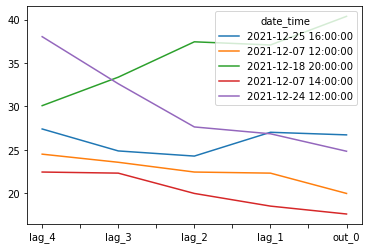

In [30]:
train.sample(5).T.plot()

In [31]:
print (train.shape)
train.dropna(axis=0, inplace=True)
print (train.shape)

(777, 5)
(773, 5)


<ipython-input-31-efbcb93d7c03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(axis=0, inplace=True)


In [32]:
trainX = train[[x for x in list(train) if 'lag' in x]]
trainY = train[[x for x in list(train) if 'out' in x]]
testX = test[[x for x in list(train) if 'lag' in x]]
testY = test[[x for x in list(train) if 'out' in x]]

### Model Training

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(trainX, trainY)

LinearRegression()

### Model Prediction

In [34]:
preds = lr.predict(testX)

In [35]:
preds = pd.DataFrame(preds)

In [36]:
list(testY.values[0])

[26.80092152]

In [37]:
list(preds.values[0])

[28.437331941179018]

### MAPE and MAE

In [38]:
import numpy as np

In [39]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [41]:
def report_metrics(true,predictions):
    print (f" p: {p}\
              h: {h}\
              MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [42]:
report_metrics  (testY, preds)

 p: 4              h: 1              MAPE: 0.06105799085892844              MAE: 1.6364104211790185


## T1.4 Naive Approach

In [144]:
train = df_house_A_train

In [145]:
dd= np.asarray(train.consumption_kw_A)

In [146]:
test = df_house_A_test

In [147]:
y_hat = test.copy()

In [148]:
y_hat['naive'] = dd[len(dd)-1]

In [149]:
y_hat

,date_time,consumption_kw_A,naive
48,2021-12-01 01:00:00,23.675968,22.492288
49,2021-12-01 02:00:00,25.239773,22.492288
50,2021-12-01 03:00:00,26.844480,22.492288
51,2021-12-01 04:00:00,28.815815,22.492288
52,2021-12-01 05:00:00,30.333043,22.492288
...,...,...,...
787,2021-12-31 20:00:00,23.850543,22.492288
788,2021-12-31 21:00:00,23.654771,22.492288
789,2021-12-31 22:00:00,22.806547,22.492288
790,2021-12-31 23:00:00,21.532958,22.492288


In [150]:
import matplotlib.pyplot as plt 

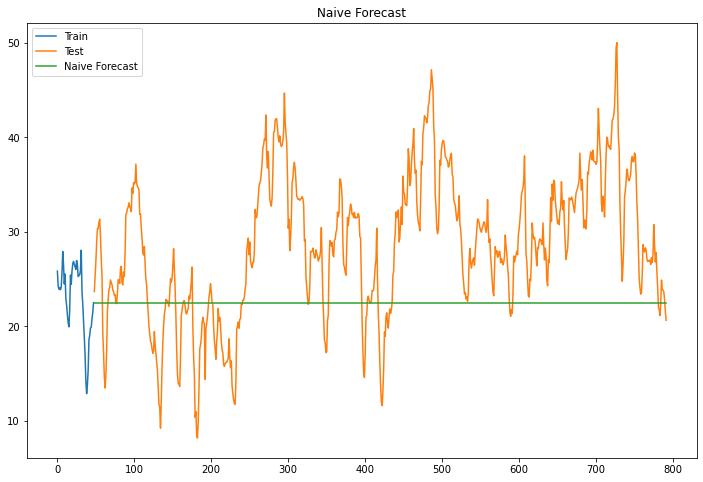

In [151]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train.consumption_kw_A, label='Train')
plt.plot(test.index,test.consumption_kw_A, label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

### MAPE and MAE

In [152]:
import numpy as np

In [153]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [155]:
def report_metrics(true,predictions):
    print (f" MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [156]:
report_metrics  (test.consumption_kw_A, y_hat.naive)

 MAPE: 0.26793985665006614              MAE: 7.893669610294355


## T1.5 ARIMA Model

In [142]:
train = df_house_A_train['consumption_kw_A']

In [143]:
test = df_house_A_test['consumption_kw_A']

In [144]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order = (3,1,2))

In [145]:
model_fitted = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [146]:
preds = model_fitted.forecast(len(test))

In [147]:
result = preds.reset_index(drop = True)

### MAPE and MAE

In [148]:
import numpy as np

In [149]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [151]:
def report_metrics(true,predictions):
    print (f" MAPE: {mean_absolute_percentage_error(true,predictions)}\
              MAE: {mean_absolute_error(true,predictions)}")

In [152]:
report_metrics  (test, result)

 MAPE: 0.2606731166683318              MAE: 7.5781299409779574
